From the Graph D below, the shortest path from source to sink is ['source', 22, 102, 183, 'sink'] with a total cost of  12 


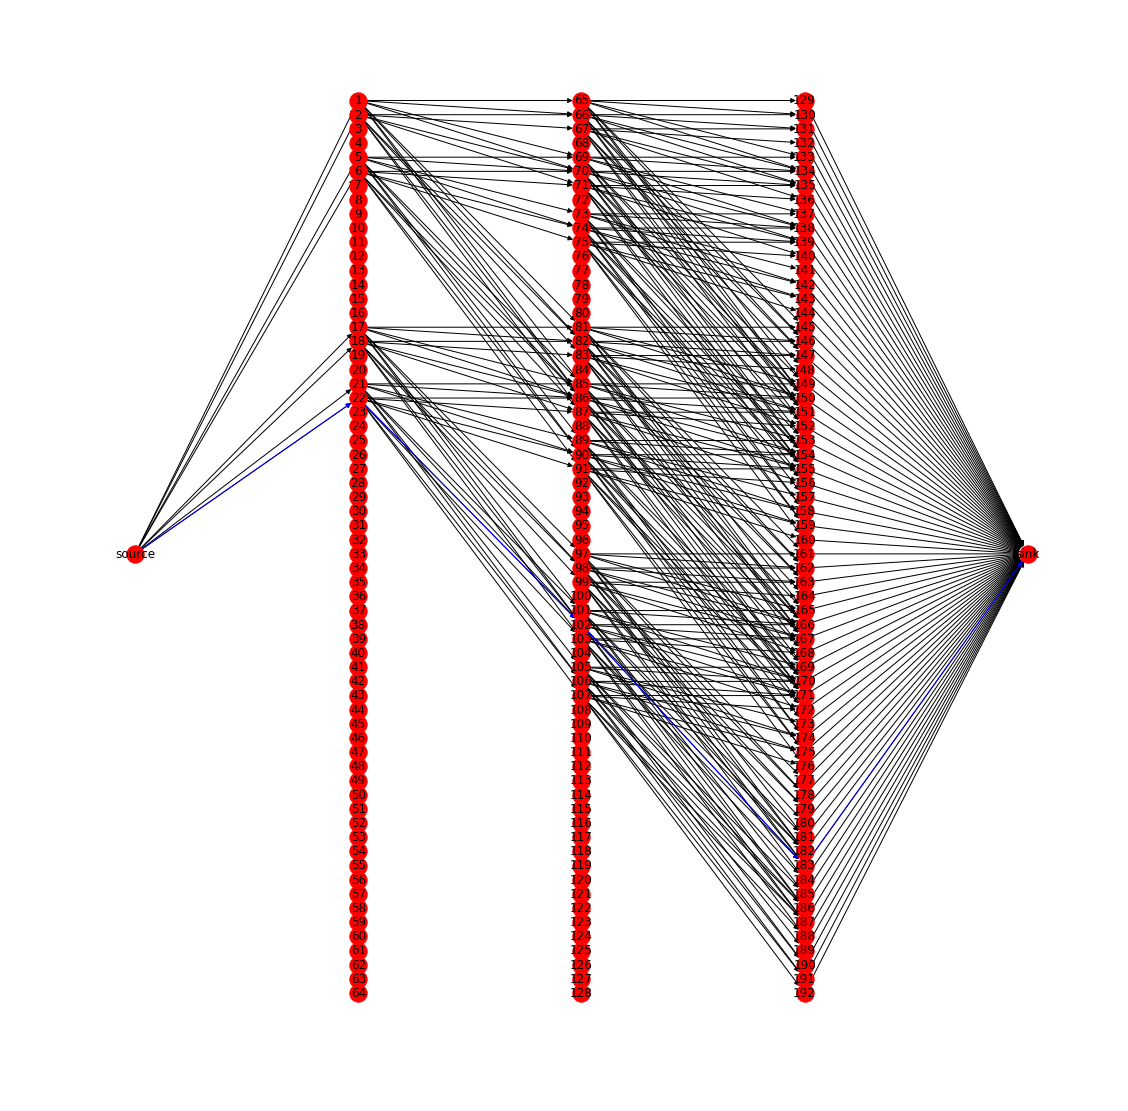

In [59]:
from matplotlib import pyplot as plt
import networkx as nx
import itertools
import copy
import pylab as py
import operator as op
import functools as ft
import itertools as it


#this function produces the number of v vectors
def prod(iterable):
    p = 1
    for n in iterable:
        p *= (n+1)
    return p
# this function generates all the possible v vectors and returns them all in a big list
def produce(d):
    arr = []
    correct_list =[]
    curr = []
    r= len(d)
    greatest = max(d)
    for i in range(0,greatest+1):
        arr = arr + [i]
    all_poss_arr = list(itertools.product(arr,repeat = r))    
    for i in range(0,len(all_poss_arr)):
        curr = all_poss_arr[i]
        cnt = 0
        for j in range(0,len(curr)):
            if curr[j] <= d[j]:
                cnt = cnt +1
        if cnt == r:
            curr = list(curr)
            currcopy = copy.copy(curr)
            correct_list = correct_list + [currcopy]
            cnt =0
    return correct_list
        
def main(deg_seq_H, H_edges, r, s,func):
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~initialize DP Graph~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    D = nx.DiGraph()
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~Produce all possible v vectors possible under d_{i} restrictions~~~~~~~~~~~~~~~~~~~~~~~~~~
    #list_of_v = list(it.product(*[range(x + 1) for x in d]))
    list_of_v = produce(deg_seq_H)
    num_of_v = len(list_of_v)
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~intialize source and sink node~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    blank = []
    for i in range(0,r):
        blank =  blank + [0]
    D.add_node('source', state = [blank,0],empty = [])
    D.add_node('sink', state = [blank,s+1], empty = [])
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~generate all the nodes in between source and sink~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    for j in range(0,s):
        for i in range(0,num_of_v):
            D.add_node(((j*num_of_v) + i+1), state = [list_of_v[i],j+1], empty = [])
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~link up source to node 1~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    D.add_edge('source',1,weight = func[r][sum(list_of_v[0])])
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~link up source to all j=1~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    for q in range(2,num_of_v+1):
        curr_v = list_of_v[q-1]
        edges = []
        cnter = 0
        if (all(i <= 1 for i in curr_v)):
            for i in range(0,len(curr_v)):
                if curr_v[i] == 1:
                    edges = edges+ [i]
            for y in range(0,len(edges)):
                if (edges[y]+1) in H_edges[0]:
                    cnter = cnter +1
                if cnter == len(edges):
                    D.add_edge('source',q,weight = func[r][sum(curr_v)])
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Add Edges between nodes from j=1 to j=s ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    for j in range(1,s):                                               #for loop for all the different stages
        for i in range(1,num_of_v+1):                        #for loop for all the different nodes in stage j
            curr_node_number = ((j-1)*num_of_v) + i
            if list(D.predecessors(curr_node_number)) != []:
                u_vector = D.node[curr_node_number]['state'][0] 
                for k in range(1,num_of_v+1):                       
                    cnt = 0
                    prospective_node_number = (j*num_of_v) + k
                    v_vector = D.node[prospective_node_number]['state'][0] 
                    diff = [x1 - x2 for (x1, x2) in zip(v_vector, u_vector)]
                    edges_mid = []
                    if (all((y == 1 or y == 0) for y in diff)):
                        if sum(diff) == 0:
                            D.add_edge(curr_node_number,prospective_node_number,weight = func[r+j][0])
                        for w in range(0,len(diff)):
                            if diff[w] == 1:
                                edges_mid = edges_mid + [w+1]
                        for t in range(0,len(edges_mid)):
                            if (edges_mid[t]) in H_edges[j]:
                                cnt = cnt + 1
                        if cnt == len(edges_mid):
                            D.add_edge(curr_node_number,prospective_node_number,weight = func[r+j][sum(diff)])
                        edges_mid = []
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Connect all nodes from j=s to sink j=s+1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    for q in range(((s-1)*len(list_of_v))+1,(s*len(list_of_v)+1)):
        cost_tot = 0
        curr_v = list_of_v[q-(num_of_v*(s-1))-1]
        for i in range(0,r):
            cost_tot = cost_tot + func[i][curr_v[i]]
        D.add_edge(q,'sink',weight = cost_tot)
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Pass the Digraph D ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    return D

def path_maker(list1):
    corr = []
    for i in range(0,len(list1)-1):
        corr = corr + [[list1[i],list1[i+1]]]
    return corr

def drawgraph(graph,path,d,s):
    corr_path = path_maker(path)
    num_of_v = prod(d)
    max_y = 3*num_of_v
    pos = {'source':(0,0), 'sink':(5.5*(s+1),0)}
    for j in range(1,s+1):
        for i in range(1,num_of_v+1):
            pos[((j-1)*num_of_v)+i] = (5.5*j,(max_y/2 - 3*(i-1)))
    node_labels = nx.get_node_attributes(graph,'state')
    best_pos ={i:pos[i] for i in pos if i in path}  
    nx.draw(graph,pos)
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edges(graph, pos = best_pos,nodelist = [], edgelist = corr_path, edge_color = 'b')

def drawgraph_no_lonely_nodes(graph,path,d,s):
    corr_path = path_maker(path)
    num_of_v = prod(d)
    max_y = 3*num_of_v
    pos = {'source':(0,0), 'sink':(5.5*(s+1),0)}
    for j in range(1,s+1):
        for i in range(1,num_of_v+1):
            pos[((j-1)*num_of_v)+i] = (5.5*j,(max_y/2 - 3*(i-1)))
    nodes = [[],[],[],[],[],[],[],[],[],[],[]]
    for q in range(129,193):
        nodes[2] = nodes[2] + [q]
    for j in range(1,s):                                            
        for i in range(1,num_of_v+1):
            curr_node_number = ((j-1)*num_of_v) + i
            if list(graph.predecessors(curr_node_number)) != []:
                nodes[j-1] = nodes[j-1] + [curr_node_number]
    realnodes = list(itertools.chain.from_iterable(nodes))
    node_labels = nx.get_node_attributes(graph,'empty')
    realnodes = realnodes + ['sink'] + ['source']
    real_node_labels  = {i:node_labels[i] for i in node_labels if i in realnodes}
    real_pos ={i:pos[i] for i in pos if i in realnodes}  
    best_pos ={i:pos[i] for i in pos if i in path}  
    real_edges = graph.edges(realnodes)
    nx.draw_networkx_nodes(graph, pos = real_pos, nodelist = realnodes, node_color = 'k') 
    nx.draw_networkx_labels(graph, pos = real_pos,nodelist = realnodes, labels= real_node_labels, font_color = 'w')
    nx.draw_networkx_edges(graph, pos = real_pos, nodelist = [], edgelist = real_edges, edge_color = 'k')
    nx.draw_networkx_edges(graph, pos = best_pos, nodelist = [], edgelist = corr_path, edge_color = 'b')
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DRIVER CODE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
s=3
deg_seq_of_H = [3,3,3]
edges_of_H = [[1,2,3],[1,2,3],[1,2,3]]
r = 3
f_1 = [0,1,2,3]  
f_2 = [0,1,4,5]    
f_3 = [5,6,6,8] 
f_4 = [10,8,2,0]  
f_5 = [8,2,1,0]  
f_6 = [3,2,0,0]
function = [f_1,f_2,f_3,f_4,f_5,f_6,f_1,f_1,f_1,f_1]
D = main(deg_seq_of_H,edges_of_H,r,s,function)
plt.figure(3,figsize=(15,15)) 
best_path = nx.bellman_ford_path(D, 'source', 'sink', weight='weight')
best_cost = nx.bellman_ford_path_length(D,'source','sink',weight = 'weight')
drawgraph(D,best_path,deg_seq_of_H,s)
print("From the Graph D below, the shortest path from source to sink is %s with a total cost of % d " %(best_path,best_cost))